<a href="https://colab.research.google.com/github/mouhamedmef/site-scraping-/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = {
    "Journee": ["JOURNEE 1", "JOURNEE 1", "JOURNEE 1", "JOURNEE 1", "JOURNEE 1", "JOURNEE 1", "JOURNEE 1", "JOURNEE 1",
                "JOURNEE 2", "JOURNEE 2", "JOURNEE 2", "JOURNEE 2", "JOURNEE 2", "JOURNEE 2", "JOURNEE 2", "JOURNEE 2",
                "JOURNEE 3", "JOURNEE 3", "JOURNEE 3", "JOURNEE 3", "JOURNEE 3", "JOURNEE 3", "JOURNEE 3", "JOURNEE 3",
                "JOURNEE 12", "JOURNEE 12", "JOURNEE 12", "JOURNEE 12", "JOURNEE 12", "JOURNEE 12", "JOURNEE 12", "JOURNEE 12",
                "JOURNEE 5", "JOURNEE 5", "JOURNEE 5", "JOURNEE 5", "JOURNEE 5", "JOURNEE 5", "JOURNEE 5", "JOURNEE 5",
                "JOURNEE 6", "JOURNEE 6", "JOURNEE 6", "JOURNEE 6", "JOURNEE 6", "JOURNEE 6", "JOURNEE 6", "JOURNEE 6",
                "JOURNEE 4", "JOURNEE 4", "JOURNEE 4", "JOURNEE 4", "JOURNEE 4", "JOURNEE 4", "JOURNEE 4", "JOURNEE 4"],
    "Match": ["ES Métlaoui vs AS Soliman", "ES Sahel vs O Béja", "US Ben Guerdane vs Club Africain", "ES Tunis vs US Tataouine",
              "ES Zarzis vs Stade Tunisien", "JS Omrane vs EGS Gafsa", "CA Bizertin vs US Monastirienne", "AS Gabès vs CS Sfaxien",
              "O Béja vs AS Gabès", "EGS Gafsa vs ES Zarzis", "US Tataouine vs CA Bizertin", "Club Africain vs JS Omrane",
              "AS Soliman vs ES Tunis", "CS Sfaxien vs US Ben Guerdane", "Stade Tunisien vs ES Métlaoui", "US Monastirienne vs ES Sahel",
              "AS Soliman vs CA Bizertin", "EGS Gafsa vs Club Africain", "JS Omrane vs CS Sfaxien", "US Ben Guerdane vs O Béja",
              "Stade Tunisien vs ES Tunis", "ES Sahel vs US Tataouine", "AS Gabès vs US Monastirienne", "ES Zarzis vs ES Métlaoui",
              "AS Soliman vs US Monastirienne", "AS Gabès vs US Ben Guerdane", "Stade Tunisien vs O Béja", "CA Bizertin vs EGS Gafsa",
              "ES Sahel vs JS Omrane", "ES Métlaoui vs CS Sfaxien", "US Tataouine vs ES Zarzis", "ES Tunis vs Club Africain",
              "Club Africain vs CS Sfaxien", "CA Bizertin vs ES Métlaoui", "JS Omrane vs US Monastirienne", "EGS Gafsa vs O Béja",
              "AS Gabès vs AS Soliman", "US Ben Guerdane vs US Tataouine", "ES Zarzis vs ES Tunis", "ES Sahel vs Stade Tunisien",
              "ES Tunis vs CA Bizertin", "O Béja vs Club Africain", "ES Métlaoui vs ES Sahel", "US Tataouine vs JS Omrane",
              "Stade Tunisien vs AS Gabès", "AS Soliman vs US Ben Guerdane", "CS Sfaxien vs ES Zarzis", "US Monastirienne vs EGS Gafsa",
              "Club Africain vs ES Zarzis", "Stade Tunisien vs CA Bizertin", "AS Soliman vs ES Sahel", "O Béja vs JS Omrane",
              "US Monastirienne vs US Ben Guerdane", "CS Sfaxien vs EGS Gafsa", "ES Métlaoui vs ES Tunis", "US Tataouine vs AS Gabès"],
    "Resultat": ["2-0", "0-1", "0-2", "3-0", "2-0", "2-0", "0-0", "2-2",
                 "1-0", "1-3", "2-0", "2-0", "1-2", "1-0", "1-0", "1-0",
                 "0-2", "1-2", "0-0", "0-0", "0-1", "2-1", "0-5", "0-1",
                 "0-1", "1-1", "3-0", "1-0", "3-0", "2-1", "1-1", "2-2",
                 "0-0", "1-1", "1-2", "0-2", "1-2", "2-0", "1-0", "0-1",
                 "0-0", "1-1", "0-0", "2-4", "2-1", "0-0", "1-1", "2-0",
                 "1-0", "1-1", "0-0", "2-1", "2-1", "2-0", "1-1", "1-2"]
}
df = pd.DataFrame(data)

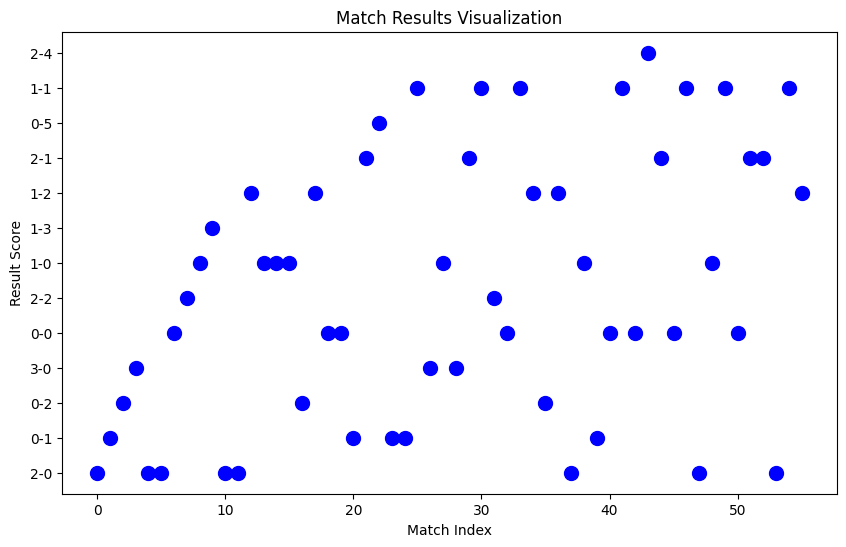

In [4]:
plt.figure(figsize=(10, 6))

# Creating a scatter plot with match results
plt.scatter(df.index, df["Resultat"], s=100, color="blue")
plt.xlabel("Match Index")
plt.ylabel("Result Score")
plt.title("Match Results Visualization")
plt.show()

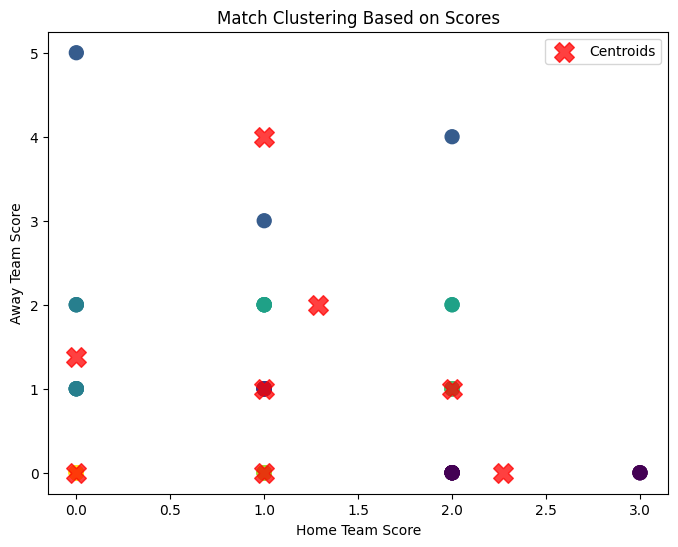

In [8]:
match_scores = np.array([list(map(int, score.split('-'))) for score in df["Resultat"]])

k = 8


kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(match_scores)
y_kmeans = kmeans.predict(match_scores)

df["cluster"] = y_kmeans

plt.figure(figsize=(8, 6))
plt.scatter(match_scores[:, 0], match_scores[:, 1], c=y_kmeans, s=100, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.75, marker="X", label="Centroids")

plt.title("Match Clustering Based on Scores")
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")
plt.legend()
plt.show()